<a href="https://colab.research.google.com/github/thisishasan/slda/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install nbconvert

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [13]:
!wget 'https://raw.githubusercontent.com/thisishasan/slda/refs/heads/main/dataset.csv'

--2025-01-24 14:10:54--  https://raw.githubusercontent.com/thisishasan/slda/refs/heads/main/dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1395853 (1.3M) [text/plain]
Saving to: ‘dataset.csv.1’

dataset.csv.1       100%[===================>]   1.33M  --.-KB/s    in 0.04s   

2025-01-24 14:10:55 (29.9 MB/s) - ‘dataset.csv.1’ saved [1395853/1395853]



In [14]:
file_path = os.path.join('dataset.csv')
df = pd.read_csv(file_path)

In [15]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df[df['Date'].dt.year == 2024]
df.head()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
4,2024-08-31,Northampton,PA,Passenger,1,0,1,14,15,6.67
11,2024-09-30,Orange,FL,Passenger,3,0,3,31,34,8.82
18,2024-03-31,San Benito,CA,Passenger,1,0,1,5,6,16.67
24,2024-11-30,Brevard,FL,Passenger,1,0,1,48,49,2.04
32,2024-06-30,Pulaski,AR,Passenger,1,0,1,22,23,4.35


In [16]:
df.rename(columns = {
    'Battery Electric Vehicles (BEVs)' : "Electric Vehicles",
    'Plug-In Hybrid Electric Vehicles (PHEVs)': 'Hybrid Electric Vehicles',
    'Non-Electric Vehicle Total': 'Non Electric Vehicles'}, inplace=True)
df.head()

,Date,County,State,Vehicle Primary Use,Electric Vehicles,Hybrid Electric Vehicles,Electric Vehicle (EV) Total,Non Electric Vehicles,Total Vehicles,Percent Electric Vehicles
4,2024-08-31,Northampton,PA,Passenger,1,0,1,14,15,6.67
11,2024-09-30,Orange,FL,Passenger,3,0,3,31,34,8.82
18,2024-03-31,San Benito,CA,Passenger,1,0,1,5,6,16.67
24,2024-11-30,Brevard,FL,Passenger,1,0,1,48,49,2.04
32,2024-06-30,Pulaski,AR,Passenger,1,0,1,22,23,4.35


In [17]:
df['Month'] = df['Date'].dt.month
df.sort_values(by=['Month'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3598 entries, 12298 to 2558
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         3598 non-null   datetime64[ns]
 1   County                       3586 non-null   object        
 2   State                        3586 non-null   object        
 3   Vehicle Primary Use          3598 non-null   object        
 4   Electric Vehicles            3598 non-null   int64         
 5   Hybrid Electric Vehicles     3598 non-null   int64         
 6   Electric Vehicle (EV) Total  3598 non-null   int64         
 7   Non Electric Vehicles        3598 non-null   int64         
 8   Total Vehicles               3598 non-null   int64         
 9   Percent Electric Vehicles    3598 non-null   float64       
 10  Month                        3598 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), 

In [18]:
grouped_by_month = df.groupby('Month')[
    ['Electric Vehicles', 'Hybrid Electric Vehicles', 'Non Electric Vehicles']
].sum().reset_index()

grouped_by_month.head(50)

,Month,Electric Vehicles,Hybrid Electric Vehicles,Non Electric Vehicles
0,1,135182,37949,5993148
1,2,138736,38787,5981782
2,3,141365,39624,5978526
3,4,145115,40594,5985050
4,5,148577,41314,5980475
5,6,150876,41973,5970401
6,7,155317,42924,5963695
7,8,160176,43719,5948779
8,9,164423,44388,5926579
9,10,168826,45170,5900477


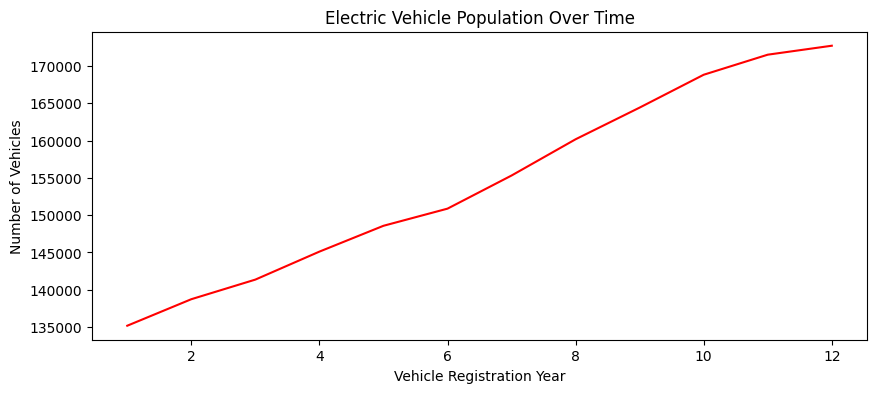

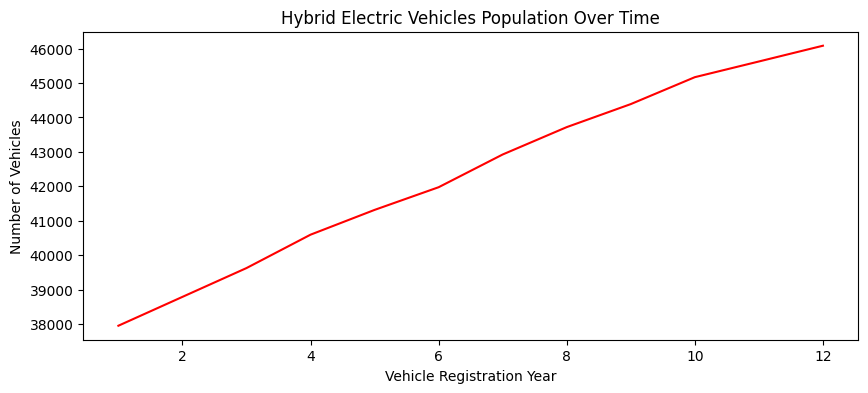

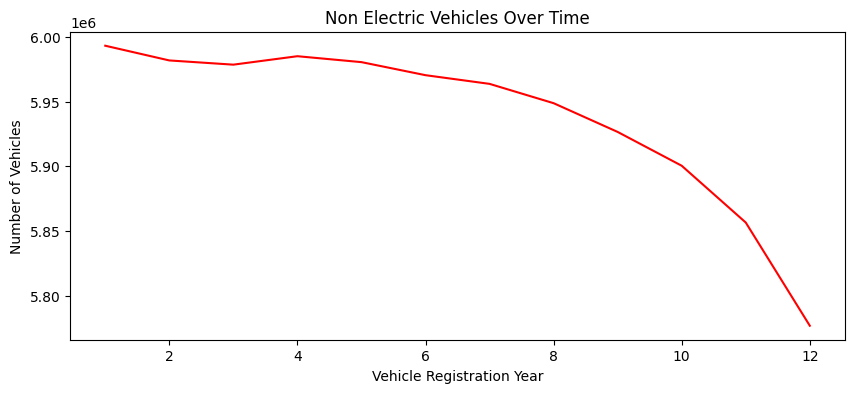

In [19]:
plt.figure(figsize=(10,4), dpi = 100)
plt.plot(grouped_by_month['Month'], grouped_by_month['Electric Vehicles'], '-r')
plt.xlabel('Vehicle Registration Year')
plt.ylabel('Number of Vehicles')
plt.title('Electric Vehicle Population Over Time')
plt.show()

plt.figure(figsize=(10,4), dpi = 100)
plt.plot(grouped_by_month['Month'], grouped_by_month['Hybrid Electric Vehicles'], '-r')
plt.xlabel('Vehicle Registration Year')
plt.ylabel('Number of Vehicles')
plt.title('Hybrid Electric Vehicles Population Over Time')
plt.show()

plt.figure(figsize=(10,4), dpi = 100)
plt.plot(grouped_by_month['Month'], grouped_by_month['Non Electric Vehicles'], '-r')
plt.xlabel('Vehicle Registration Year')
plt.ylabel('Number of Vehicles')
plt.title('Non Electric Vehicles Over Time')
plt.show()

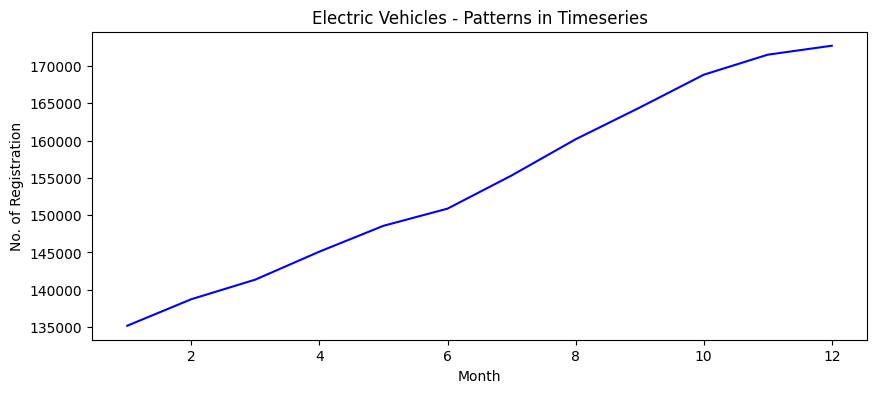

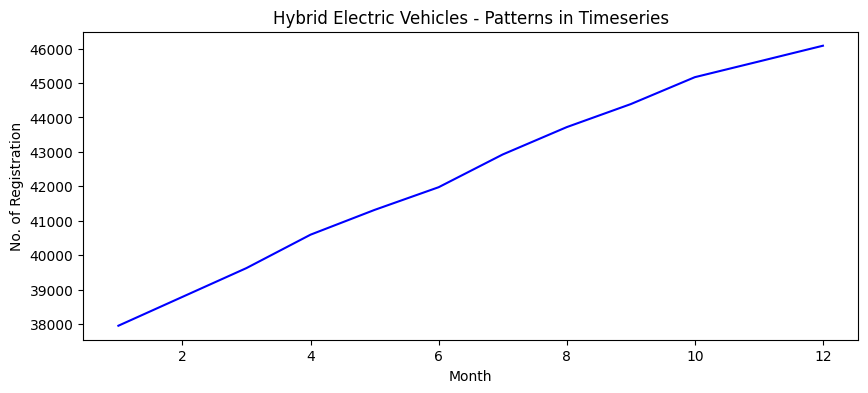

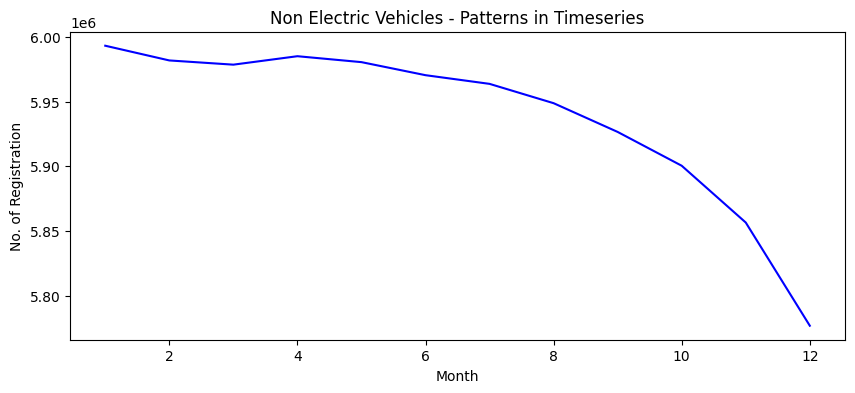

In [20]:
plt.figure(figsize=(10,4), dpi = 100)
plt.plot(grouped_by_month['Month'], grouped_by_month['Electric Vehicles'], '-b')
plt.xlabel('Month')
plt.ylabel('No. of Registration')
plt.title("Electric Vehicles - Patterns in Timeseries")

plt.show()

plt.figure(figsize=(10,4), dpi = 100)
plt.plot(grouped_by_month['Month'], grouped_by_month['Hybrid Electric Vehicles'], '-b')
plt.xlabel('Month')
plt.ylabel('No. of Registration')
plt.title("Hybrid Electric Vehicles - Patterns in Timeseries")
plt.show()

plt.figure(figsize=(10,4), dpi = 100)
plt.plot(grouped_by_month['Month'], grouped_by_month['Non Electric Vehicles'], '-b')
plt.xlabel('Month')
plt.ylabel('No. of Registration')
plt.title("Non Electric Vehicles - Patterns in Timeseries")
plt.show()